In [15]:
## import necessary libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [16]:
## Read a csv file using pandas library 
df=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv")
print(df)

      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Strength  
0               1040.0           676.0   28     79.99  
1               1055.0           676.0   28    

In [17]:
## Checking shape of data
df.shape

(1030, 9)

In [18]:
#Checking th whole data using describe function
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [19]:
# Observing that missing values are available or not
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [20]:
##Split data into X and y
df_col=df.columns
X=df[df_col[df_col!="Strength"]]
y=df["Strength"]

In [21]:
X.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28


In [22]:
y.tail()

1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, dtype: float64

In [103]:
X.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28


In [104]:
## Split data into test and t rain set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=None)

In [105]:
X_test.shape

(309, 8)

In [106]:
y_train.shape

(721,)

In [107]:
n_col=X_norm.shape[1]

In [108]:
n_col


8

In [112]:
##Model creation function
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_col,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['mse', 'mae'])
    return model
              

In [113]:
# build the model
model = regression_model()

In [115]:
history=model.fit(X_train,y_train,epochs=50,verbose=2,validation_split=0.3)

Epoch 1/50
16/16 - 0s - loss: 67.6153 - mse: 67.6153 - mae: 6.3913 - val_loss: 85.4202 - val_mse: 85.4202 - val_mae: 7.4788 - 194ms/epoch - 12ms/step
Epoch 2/50
16/16 - 0s - loss: 76.3241 - mse: 76.3241 - mae: 7.0414 - val_loss: 71.7765 - val_mse: 71.7765 - val_mae: 6.5353 - 104ms/epoch - 7ms/step
Epoch 3/50
16/16 - 0s - loss: 69.0500 - mse: 69.0500 - mae: 6.3614 - val_loss: 73.5915 - val_mse: 73.5915 - val_mae: 6.4242 - 105ms/epoch - 7ms/step
Epoch 4/50
16/16 - 0s - loss: 64.0474 - mse: 64.0474 - mae: 6.2539 - val_loss: 68.6042 - val_mse: 68.6042 - val_mae: 6.4063 - 93ms/epoch - 6ms/step
Epoch 5/50
16/16 - 0s - loss: 62.3392 - mse: 62.3392 - mae: 6.1239 - val_loss: 72.6873 - val_mse: 72.6873 - val_mae: 6.8018 - 106ms/epoch - 7ms/step
Epoch 6/50
16/16 - 0s - loss: 65.2691 - mse: 65.2691 - mae: 6.3375 - val_loss: 66.9674 - val_mse: 66.9674 - val_mae: 6.2729 - 108ms/epoch - 7ms/step
Epoch 7/50
16/16 - 0s - loss: 66.6576 - mse: 66.6576 - mae: 6.4070 - val_loss: 64.9505 - val_mse: 64.9505 

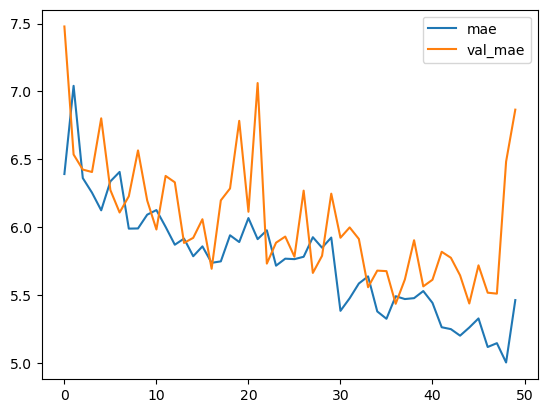

In [116]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

In [117]:
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])


Mean Squared Error :  59.2436408996582
Mean Absolute Error :  6.3095269203186035


In [118]:
y_pred=model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [119]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(y_test, y_pred))

r2 score:  0.7869942799057978


10/10 [==============================] - 0s 3ms/step


[]

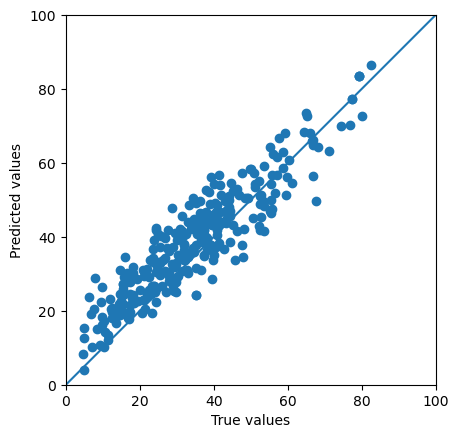

In [128]:
Y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.plot([0, 100], [0, 100])
plt.plot()


125319488.18876392